# Extra Examples - Grouping

Lets use some video game sales data: https://www.kaggle.com/gregorut/videogamesales

And answer:

1. Which genre has the highest average global sales averaged over all games
2. Which top 5 games are responsible for the biggest profit in that genre?
3. For each platform and year, what is the highest performing game?
4. For each Genre, what is the mean and standard deviation for game sales in EU? 
5. Bonus advanced follow up - can you answer if mean and std is a good representation of the data? (Hint code provided)

In [1]:
import pandas as pd

df = pd.read_csv("vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Highest earning genre

In [2]:
df1 = df.groupby(['Genre']).agg(SalesMean=('Global_Sales', 'mean')).reset_index()
top_genre = df1.sort_values(by='SalesMean', ascending=False).iloc[0, 0]
top_genre

'Platform'

## Which games carry this genre?

In [3]:
df[df.Genre==top_genre].sort_values(by = 'Global_Sales', ascending = False).Name.head()

1             Super Mario Bros.
6         New Super Mario Bros.
8     New Super Mario Bros. Wii
18            Super Mario World
21             Super Mario Land
Name: Name, dtype: object

## Best genre for platform and year

This one is actually a bit challenging to do efficiently, have fun!

In [21]:
performance = df.groupby(['Year','Platform','Genre'], as_index=False).Global_Sales.sum()
indexes = performance.groupby(['Year','Platform']).Global_Sales.idxmax()
result = df2.loc[indexes]
result

,Year,Platform,Genre,Global_Sales
3,1980.0,2600,Shooter,7.07
5,1981.0,2600,Action,14.84
15,1982.0,2600,Puzzle,10.03
19,1983.0,2600,Action,2.86
25,1983.0,NES,Platform,5.62
...,...,...,...,...
1787,2016.0,X360,Action,0.48
1796,2016.0,XOne,Shooter,4.40
1800,2017.0,PS4,Role-Playing,0.03
1801,2017.0,PSV,Action,0.01


## Mean and Std in EU per Genre

In [24]:
df2 = df.groupby(['Genre']).agg(SalesMean=('EU_Sales','mean'), STDeviation=('EU_Sales', 'std')).reset_index()
df2

,Genre,SalesMean,STDeviation
0,Action,0.158323,0.407424
1,Adventure,0.049868,0.176454
2,Fighting,0.119481,0.253013
3,Misc,0.124198,0.446592
4,Platform,0.227573,0.588545
5,Puzzle,0.087251,0.318550
6,Racing,0.190865,0.581181
7,Role-Playing,0.126384,0.488864
8,Shooter,0.239137,0.549189
9,Simulation,0.130773,0.514097


## Is this a good representation?

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


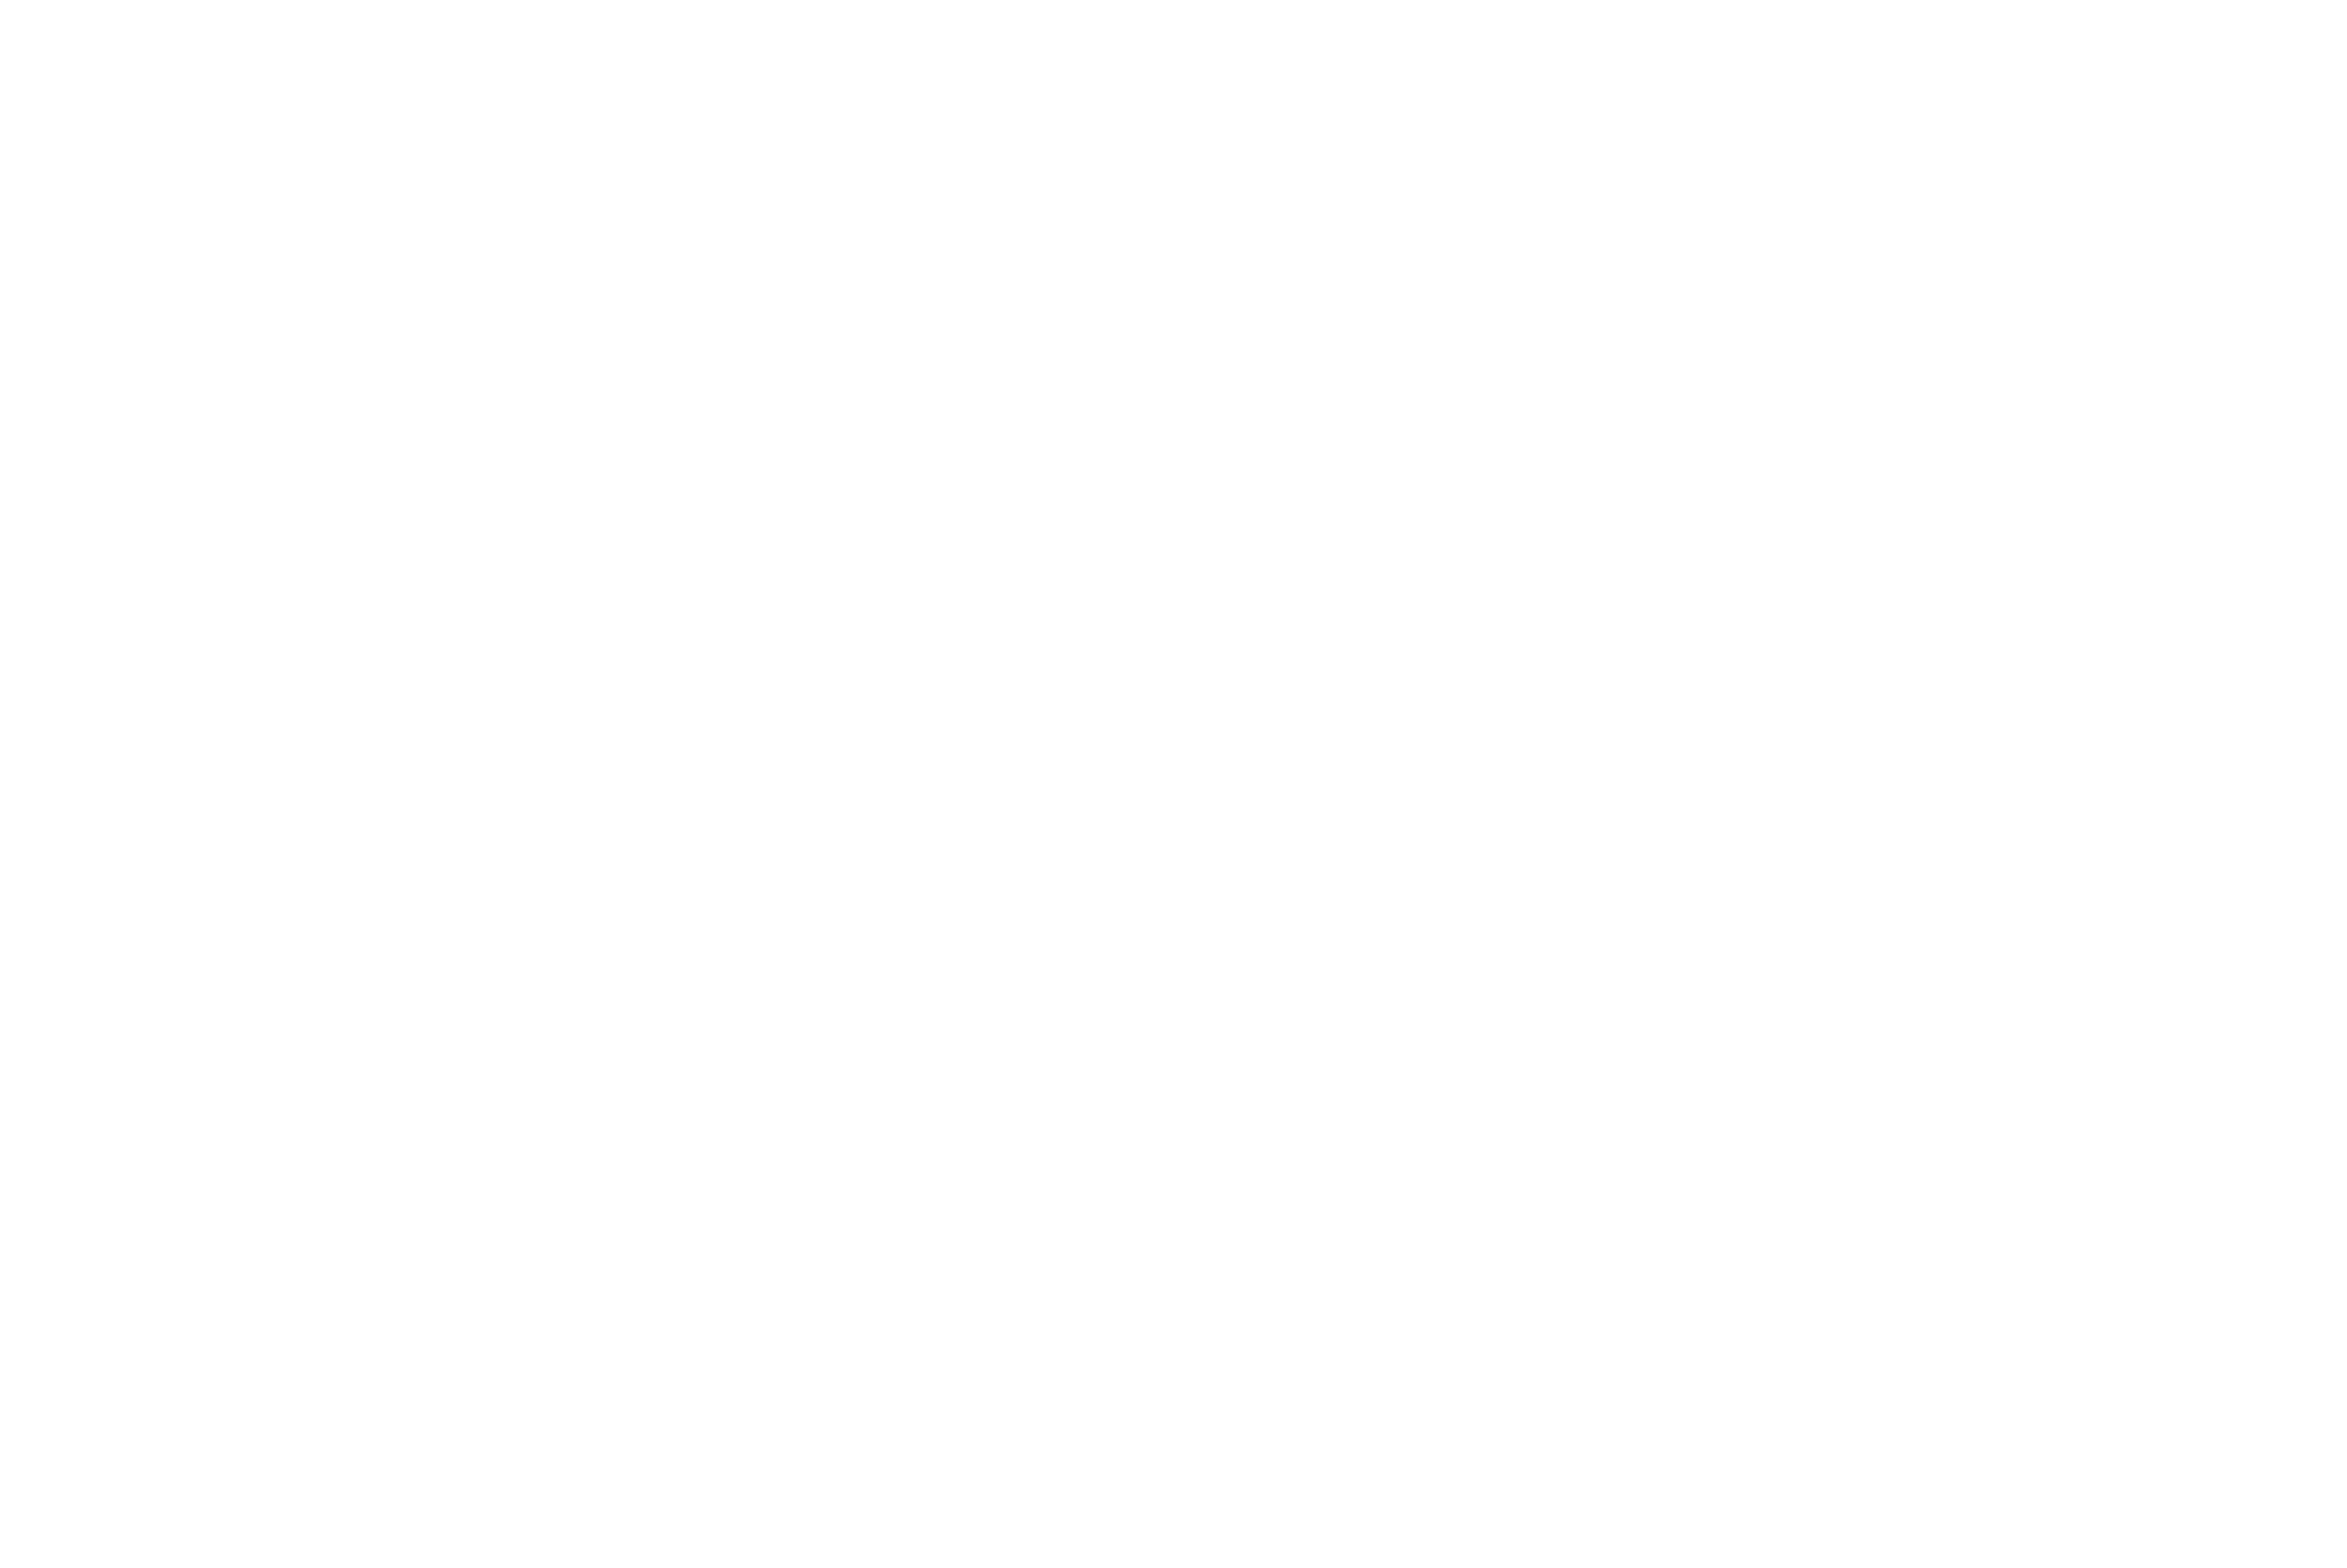

In [25]:
# Hint code, feel free to ignore
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

genres = df.Genre.unique()
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 8))
for g, ax in zip(genres, axes.flatten()):
    
    # Your code here to look at each genre and summary statistics (density=True is another hint)
       
    ax.set_title(g), ax.set_xlabel("EU Sales"), ax.set_ylabel("Prob")
    ax.legend();
plt.tight_layout();